# Simple Demo - Reviewing WEC Laptime Data

For many forms of motorsport, timing data in the form of laptime data is often made available at the end of the race. This data can be used by fans and sports data journalists alike, as well as teams and drivers, for getting a *post hoc* insight into what actuall went on in a race.

*Live laptime data is also typically provided via live timing screens, from which data feeds may be available to teams, although not, typically, to the public. (Data from timing screens can still be scraped unofficially, though...) Having access to laptime history during a race can be useful for reviewing how a race is evolving, plotting strategy, and even predicting likely future race events, such as overtaking possibilities or pit stops due to degrading laptimes.*

This notebook provides a basic demonstration of how to download and analyse [FIA World Endurance Championship (WEC) data from Al Kamel Systems](http://fiawec.alkamelsystems.com), getting a feel for what the data can tell us and how we might encourage it to reveal some of the stories it undoubtedly contains.

Timing info available as PDF, eg [here](https://assets.lemans.org/explorer/pdf/courses/2019/24-heures-du-mans/classification/race/24-heures-du-mans-2019-classification-after-24h.pdf).

CSV data from Al Kamel using links of form:

`http://fiawec.alkamelsystems.com/Results/08_2018-2019/07_SPA%20FRANCORCHAMPS/267_FIA%20WEC/201905041330_Race/Hour%206/23_Analysis_Race_Hour%206.CSV`


*Links don't seem to appear on e.g. [classification data](http://fiawec.alkamelsystems.com/)? So where else might they be found?*

## Setup

Although Python code often "just runs", there are a couple of things we can do to help improve our workflow, such as configuring the notebook to work in a particular wat, loading in Pythin programming packages that we can call on, and putting resources into specific locations.

In [1]:
#Enable inline plots
%matplotlib inline

# pandas is a python package for working with tabular datasets
import pandas as pd

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
# Add the parent dir to the import path
# This lets us load files in from child directories of the parent directory
# that this notebook is in.
import sys
sys.path.append("../py")

#Import contents of the utils.py package in the ../py directory
from utils import *

## Downloading Data

If we know the URL of an online hosted data file, we can download data directly from it.

Let's create a variable, `url`, that takes the value of the URL for an Al Kamel Systems timing data CSV file:

In [3]:
#Download URL for timing data in CSV format
url = 'http://fiawec.alkamelsystems.com/Results/08_2018-2019/07_SPA%20FRANCORCHAMPS/267_FIA%20WEC/201905041330_Race/Hour%206/23_Analysis_Race_Hour%206.CSV'


Download the data into a *pandas* dataframe, dropping any empty columns (`.dropna(how='all', axis=1)`) and then previewing the first few rows (`.head()`):

In [4]:
# Create a pandas dataframe from data loaded in directly from a web address
# dropping any empty columns...
laptimes = pd.read_csv(url, sep=';').dropna(how='all', axis=1)
# ...and then previewing the first few lines of the dataset
laptimes.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER
0,1,1,1,2:06.349,0,NaN,37.900,0,57.533,0,...,0:37.900,0:57.533,0:30.916,289.0,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion
1,1,1,2,2:00.417,0,NaN,34.830,0,54.824,0,...,0:34.830,0:54.824,0:30.763,302.7,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion
2,1,1,3,2:17.278,0,B,40.012,0,55.696,0,...,0:40.012,0:55.696,0:41.570,289.0,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion
3,1,1,4,3:10.094,0,NaN,1:26.938,0,1:07.045,0,...,1:26.938,1:07.045,0:36.111,262.4,Neel JANI,0:00:58.509,LMP1,NaN,Rebellion Racing,Rebellion
4,1,1,5,2:29.763,0,NaN,41.205,0,1:11.517,0,...,0:41.205,1:11.517,0:37.041,259.2,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion


We can save the raw data to a local CSV file so we can access it locally at a future time.

For convenience, we can create the filename that we save the file as from the URL by splitting the URL string on each '/' and selecting the last element:

In [5]:
# The .split() operator returns a list
# The [-1] indexer selects the last item in the list
outfile_name = url.split('/')[-1]
outfile_name

'23_Analysis_Race_Hour%206.CSV'

If we want to replace the `%20` encoded value for a *space* character with an *actual* space, we can "unquote" it:

In [6]:
from urllib.parse import unquote

outfile_name = unquote(outfile_name)
outfile_name

'23_Analysis_Race_Hour 6.CSV'

Now let's save the data into the sibling directory `data` as a file with that filename:

In [8]:
# The .. path says "use the parent directory
# So ../data says: use the data directory in the parent directory
laptimes.to_csv('../data/{}'.format(outfile_name))

If we have saved the data into a file, we can also load the data back in to a data from the file rather than having to download it again from its online location.

*Uncomment the following code to load the data back in from the local file.*

In [9]:
#Load data from local file
#laptimes = pd.read_csv('23_Analysis_Race_Hour 6.csv', sep=';').dropna(how='all', axis=1)
#laptimes.head()

It often makes sense to tidy a data set to make it more useable.

For example we often find that column names may include leading or trailing whitespace in the original datafile, which can make them hard to refer to, so we can rename the columns with any such whitespace stripped out.

In [10]:
# Clean the column names of any leading / trailing whitespace
# The [X for Y in Z] construction is know as a "list comprehension"
# It creates a list of values ("[]") 
# by iterating through ("for Y in") another list of values ("Z")
# and generates new list values, "X", from each original list value "Y"
laptimes.columns = [c.strip() for c in laptimes.columns]

The car and driver numbers are represented in the dataframe as numerical `int`, which is to say, *integer*, values. However, it is safer to cast this `str`, or *string* values so we don't accidentally perform numerical calculations on them, such as adding them together or finding the "average" value of them...

In [11]:
#Tidy the data a little... car and driver number are not numbers
laptimes[['NUMBER','DRIVER_NUMBER']] = laptimes[['NUMBER','DRIVER_NUMBER']].astype(str)

laptimes.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER
0,1,1,1,2:06.349,0,NaN,37.900,0,57.533,0,...,0:37.900,0:57.533,0:30.916,289.0,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion
1,1,1,2,2:00.417,0,NaN,34.830,0,54.824,0,...,0:34.830,0:54.824,0:30.763,302.7,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion
2,1,1,3,2:17.278,0,B,40.012,0,55.696,0,...,0:40.012,0:55.696,0:41.570,289.0,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion
3,1,1,4,3:10.094,0,NaN,1:26.938,0,1:07.045,0,...,1:26.938,1:07.045,0:36.111,262.4,Neel JANI,0:00:58.509,LMP1,NaN,Rebellion Racing,Rebellion
4,1,1,5,2:29.763,0,NaN,41.205,0,1:11.517,0,...,0:41.205,1:11.517,0:37.041,259.2,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion


In [12]:
# Review the column headings
laptimes.columns

Index(['NUMBER', 'DRIVER_NUMBER', 'LAP_NUMBER', 'LAP_TIME', 'LAP_IMPROVEMENT',
       'CROSSING_FINISH_LINE_IN_PIT', 'S1', 'S1_IMPROVEMENT', 'S2',
       'S2_IMPROVEMENT', 'S3', 'S3_IMPROVEMENT', 'KPH', 'ELAPSED', 'HOUR',
       'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'TOP_SPEED', 'DRIVER_NAME',
       'PIT_TIME', 'CLASS', 'GROUP', 'TEAM', 'MANUFACTURER'],
      dtype='object')

The `DRIVER_NUMBER` is relative to a car. It may be convenient to also have a unique driver number, `CAR_DRIVER`, which we can construct from the `NUMBER` and `DRIVER_NUMER` columns:

In [13]:
laptimes['CAR_DRIVER'] = laptimes['NUMBER'] + '_' + laptimes['DRIVER_NUMBER']
laptimes[['NUMBER','DRIVER_NUMBER','CAR_DRIVER']].head()

,NUMBER,DRIVER_NUMBER,CAR_DRIVER
0,1,1,1_1
1,1,1,1_1
2,1,1,1_1
3,1,1,1_1
4,1,1,1_1


## Quick demo laptime chart

The *pandas* package provides a handy `.plot()` method that allows us to plot charts directly from a dataframe. For example, we might want to plot lap time against lap number for each car.

In the original dataframe, lap times are given in the form `minute:second` (for example, `2:06.349`). To plot the laptimes, we need to convert this to a more convenient numeric form, such as the laptime given as a number of seconds.

The `utils` module we loaded in earlier contains a `getTime()` function that can perform this conversion for us. We can use a dataframe `.apply()` method to to apply that function to each value in the original `LAP_TIME` column and assign it to a new `LAP_TIME_S` column, before previewing a selection of the data frame where we select out those two columns, `LAP_TIME` and `LAP_TIME_S`:

In [14]:
laptimes['LAP_TIME_S'] = laptimes['LAP_TIME'].apply(getTime)
laptimes[['LAP_TIME','LAP_TIME_S']].head()

,LAP_TIME,LAP_TIME_S
0,2:06.349,126.349
1,2:00.417,120.417
2,2:17.278,137.278
3,3:10.094,190.094
4,2:29.763,149.763


As well as selecting out *columns* of a data frame, we can also select out rows. For example, we can select out the laptimes for car `1` using the following construction:

In [15]:
laptimes[laptimes['NUMBER']=='1'].head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,CAR_DRIVER,LAP_TIME_S
0,1,1,1,2:06.349,0,NaN,37.900,0,57.533,0,...,0:30.916,289.0,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion,1_1,126.349
1,1,1,2,2:00.417,0,NaN,34.830,0,54.824,0,...,0:30.763,302.7,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion,1_1,120.417
2,1,1,3,2:17.278,0,B,40.012,0,55.696,0,...,0:41.570,289.0,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion,1_1,137.278
3,1,1,4,3:10.094,0,NaN,1:26.938,0,1:07.045,0,...,0:36.111,262.4,Neel JANI,0:00:58.509,LMP1,NaN,Rebellion Racing,Rebellion,1_1,190.094
4,1,1,5,2:29.763,0,NaN,41.205,0,1:11.517,0,...,0:37.041,259.2,Neel JANI,NaN,LMP1,NaN,Rebellion Racing,Rebellion,1_1,149.763


Let's start with a plot that allows us to select a particular car number and plot the laptimes associated with it:

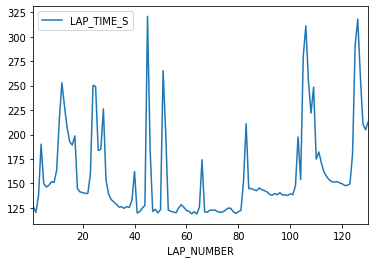

In [16]:
laptimes[laptimes['NUMBER']=='1'].plot(x='LAP_NUMBER',y='LAP_TIME_S');

We can easily create a function for that decorated with the *ipywidgets* `interact` function to create a set of widget that allows us to select a particular car and plot the laptimes associated with it:

In [17]:
from ipywidgets import interact

@interact(number=laptimes['NUMBER'].unique().tolist(),)
def plotLapByNumber(number):
    laptimes[laptimes['NUMBER']==number].plot(x='LAP_NUMBER',y='LAP_TIME_S')

interactive(children=(Dropdown(description='number', options=('1', '11', '17', '26', '28', '29', '3', '31', '3…

We can also highlight which laps were driven by which driver by splitting the data for a particular car out over several columns, one for each driver, and then potting each driver column using a separate colour.

The table is reshaped using the *pandas* `pivot()` method, setting the lap number as the *index* of the pivoted dataframe and splitting the `LAP_TIME_S` *values* out over several new *columns* that identify each `DRIVER_NUMBER`:

In [18]:
laptimes[laptimes['NUMBER']=='1'].pivot(index='LAP_NUMBER',
                                        columns='DRIVER_NUMBER',
                                        values='LAP_TIME_S').head()

DRIVER_NUMBER,1,2,3
LAP_NUMBER,,,
1,126.349,NaN,NaN
2,120.417,NaN,NaN
3,137.278,NaN,NaN
4,190.094,NaN,NaN
5,149.763,NaN,NaN


The `.plot()` command will, by default, plot the values in each column of a dataframe as a separate line against the corresponding index values:

In [19]:
@interact(number=laptimes['NUMBER'].unique().tolist(),)
def plotLapByNumberDriver(number):
    # We can pivot long to wide on driver number,
    # then plot all cols against the lapnumber index
    laptimes[laptimes['NUMBER']==number].pivot(index='LAP_NUMBER',
                                               columns='DRIVER_NUMBER',
                                               values='LAP_TIME_S').plot()


interactive(children=(Dropdown(description='number', options=('1', '11', '17', '26', '28', '29', '3', '31', '3…

We can also add annotations to the chart. For example, we might want to identify laps on which the car pitted so that we can disambiguate slow laps caused by an on-track incident, for example, from laps where the driver went through the pit lane.

By inspection of the original table, we note that there are two columns that provide relevant information: the `CROSSING_FINISH_LINE_IN_PIT` column takes the value 'B' for laps where the car crosses the finish line in the pit, a null value otherwise;  and the `PIT_TIME` column takes a value on laps where the car exits the pit lane at the start of a lap, null otherwise.

*(In general, depending on the timing marker, lap times for laps where the car crossed the finish line in the pit may or may not include the pit stop time.)*

In [20]:
@interact(number=laptimes['NUMBER'].unique().tolist(),
          pitentrylap=True)
def plotLapByNumberDriverWithPit(number, pitentrylap):
    # We can pivot long to wide on driver number,
    # then plot all cols against the lapnumber index
    #Grap the matplotli axes so we can overplot onto them
    ax = laptimes[laptimes['NUMBER']==number].pivot(index='LAP_NUMBER',
                                                    columns='DRIVER_NUMBER',
                                                    values='LAP_TIME_S').plot()
    # Also add in pit laps
    # Filter rows that identify both the car
    # and the laps on which the car crossed the finish line in the pit
    pitcondition = (laptimes['CROSSING_FINISH_LINE_IN_PIT']=='B') if pitentrylap \
                    else ~(laptimes['PIT_TIME'].isnull())
    inpitlaps = laptimes[(laptimes['NUMBER']==number) & (pitcondition) ]
    # Plot a marker for each of those rows
    inpitlaps.plot.scatter(x='LAP_NUMBER',y='LAP_TIME_S', ax=ax)
    

interactive(children=(Dropdown(description='number', options=('1', '11', '17', '26', '28', '29', '3', '31', '3…

### Inlaps and Outlaps

We can use the pit information to create a convenience column with Boolean values that indicate whether a lap was in in-lap or not (that is, whether lap was completed in the pit lane).

We can also shift this column to create a column that contains an outlap flag. We can decide whether the set the initial (first lap) value to be an outlap (`True`) or not.

*Alternatively, we could  set the outlap as laps where there is a non-null value for the pit stop time. This would have a `False` value for the first lap.*

In [21]:
#Create a flag to identify when we enter the pit, aka an INLAP
laptimes['INLAP'] = (laptimes['CROSSING_FINISH_LINE_IN_PIT'] == 'B')

#Make no assumptions about table order - so sort by lap number
laptimes = laptimes.sort_values(['NUMBER','LAP_NUMBER'])

# Identify a new stint for each car by shifting the pitting / INLAP flag within car tables
laptimes['OUTLAP'] = laptimes.groupby('NUMBER')['INLAP'].shift(fill_value=True)

#Alternatively, we could define the outlap by laps where there is a non-null pit time
#laptimes['OUTLAP'] = ~laptimes['PIT_TIME'].isnull()

laptimes[['DRIVER_NUMBER', 'INLAP','OUTLAP']].head()

,DRIVER_NUMBER,INLAP,OUTLAP
0,1,False,True
1,1,False,False
2,1,True,False
3,1,False,True
4,1,False,False


## Stint Detection

Looking at the chart of laptimes vs driver number, we see that each car is on track for several distinct contiguous lap periods, which we might describe as "stints".

We can identify several simple heuristics for identifying different sorts of stint:

- *driver session*: session equates to continuous period in car irrespective of whether or not the car pits;
- *car stint*: laps covered between each pit event; note that in the case of a drive through penalty, this will be counted as a pit event becuase the car passed through the pits, even if the car did not stop; the same is true of stop and go penalties where the car does stop but no work may be carried out on it;
- *driver stint*: relative to pit stops; that is, a driver stint is a period bewteen pit stops for a particular driver; this may be renumbered for each session?

#### Driver Session

We can identify laps where there was a driver change within a particular car by testing whether or not the driver is the same within a car across consecutive laps, setting an appropriate default value for the first lap of the race.

In [22]:
#Also set overall lap = 1 to be a driver change
laptimes['driverchange'] = (~laptimes['DRIVER_NUMBER'].eq(laptimes['DRIVER_NUMBER'].shift())) | (laptimes['LAP_NUMBER']==1)

A driver session is then a count for each driver of the number driver change laps they have been associated with. The *pandas* `cumsum()` method provides a *cumulative sum* operator that can be applied to the values of a column. When the column is typed as a set of Boolean values, `True` values count `1` and `False` values count `0`: 

In [23]:
pd.DataFrame({'booleans':[False, True, False, False, True, False]}).cumsum()

,booleans
0,0
1,1
2,1
3,1
4,2
5,2


If we group the rows in the dataframe by driver — that is, generating separate groups of rows that contain the laptimes associated with a single driver — and then apply a `cumsum()` over the `driverchange` column within each group, we get a a numeric count of the number of sessions each driver has had.

The *pandas* `groupby()` method can be used to access groups of rows based on one or more column values. For example, we can group rows by the car and driver and then pull out just the rows associated with one group using the `get_group()` method:

In [24]:
car_num = '1'
driver_num = '1'

laptimes.groupby(['NUMBER', 'DRIVER_NUMBER']).get_group( (car_num, driver_num) ).head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,CAR_DRIVER,LAP_TIME_S,INLAP,OUTLAP,driverchange
0,1,1,1,2:06.349,0,NaN,37.900,0,57.533,0,...,NaN,LMP1,NaN,Rebellion Racing,Rebellion,1_1,126.349,False,True,True
1,1,1,2,2:00.417,0,NaN,34.830,0,54.824,0,...,NaN,LMP1,NaN,Rebellion Racing,Rebellion,1_1,120.417,False,False,False
2,1,1,3,2:17.278,0,B,40.012,0,55.696,0,...,NaN,LMP1,NaN,Rebellion Racing,Rebellion,1_1,137.278,True,False,False
3,1,1,4,3:10.094,0,NaN,1:26.938,0,1:07.045,0,...,0:00:58.509,LMP1,NaN,Rebellion Racing,Rebellion,1_1,190.094,False,True,False
4,1,1,5,2:29.763,0,NaN,41.205,0,1:11.517,0,...,NaN,LMP1,NaN,Rebellion Racing,Rebellion,1_1,149.763,False,False,False


When applying the `cumsum()` operator to a `groupby()` object, it will be automatically applied to the set of rows associated with each separate group:

In [25]:
laptimes['DRIVER_SESSION'] = laptimes.groupby(['NUMBER', 'DRIVER_NUMBER'])['driverchange'].cumsum().astype(int)

#Preview
laptimes[['DRIVER_NUMBER', 'driverchange','DRIVER_SESSION','LAP_NUMBER']][42:48]

,DRIVER_NUMBER,driverchange,DRIVER_SESSION,LAP_NUMBER
42,1,False,1,43
43,1,False,1,44
44,1,False,1,45
45,2,True,1,46
46,2,False,1,47
47,2,False,1,48


#### Car Stint

If we define a *car stint* as a period in between pit events, irrespective of driver, we can calculate it by simply by counting the number of pit event flags associated with the car.

In [26]:
#Create a counter for each pit stop - the pit flag is entering pit at end of stint
#  so a new stint applies on the lap after a pit
#Find the car stint based on count of pit stops
laptimes['CAR_STINT'] = laptimes.groupby('NUMBER')['OUTLAP'].cumsum().astype(int)

laptimes[['CROSSING_FINISH_LINE_IN_PIT', 'INLAP', 'OUTLAP', 'CAR_STINT']].head()

,CROSSING_FINISH_LINE_IN_PIT,INLAP,OUTLAP,CAR_STINT
0,NaN,False,True,1
1,NaN,False,False,1
2,B,True,False,1
3,NaN,False,True,2
4,NaN,False,False,2


#### Driver Stint

Defining a *driver stint* as a stint between pit events for a particular driver, we can generate a *driver stint* number for each driver as a cumulative count of outlap flags associated with the driver.

To provide a unique stint identifier, we can derive another column that identifies the car, driver and driver stint number:

In [27]:
#Driver stint - a cumulative count for each driver of their stints
laptimes['DRIVER_STINT'] = laptimes.groupby('CAR_DRIVER')['OUTLAP'].cumsum().astype(int)

#Let's also derive another identifier - CAR_DRIVER_STINT
laptimes['CAR_DRIVER_STINT'] = laptimes['CAR_DRIVER'] + '_' + laptimes['DRIVER_STINT'].astype(str)

laptimes[['CAR_DRIVER', 'CROSSING_FINISH_LINE_IN_PIT', 'INLAP',
          'CAR_STINT', 'DRIVER_STINT', 'CAR_DRIVER_STINT']].tail(20).head(10)


,CAR_DRIVER,CROSSING_FINISH_LINE_IN_PIT,INLAP,CAR_STINT,DRIVER_STINT,CAR_DRIVER_STINT
4212,98_2,NaN,False,7,1,98_2_1
4213,98_2,NaN,False,7,1,98_2_1
4214,98_2,NaN,False,7,1,98_2_1
4215,98_2,NaN,False,7,1,98_2_1
4216,98_2,NaN,False,7,1,98_2_1
4217,98_2,B,True,7,1,98_2_1
4218,98_2,NaN,False,8,2,98_2_2
4219,98_2,NaN,False,8,2,98_2_2
4220,98_2,NaN,False,8,2,98_2_2
4221,98_2,NaN,False,8,2,98_2_2


#### Driver Session Stint

Where a driver pits within a driver session, we may want to identify the driver stints within a particular session. This can be calculated as a cumulative sum of outlap flags over driver sessions:

In [28]:
#Driver session stint - a count for each driver of their stints within a particular driving session
laptimes['DRIVER_SESSION_STINT'] = laptimes.groupby(['CAR_DRIVER','DRIVER_SESSION'])['OUTLAP'].cumsum().astype(int)

laptimes[['CAR_DRIVER', 'CROSSING_FINISH_LINE_IN_PIT',
          'INLAP','CAR_STINT', 'DRIVER_STINT', 'CAR_DRIVER_STINT',
          'DRIVER_SESSION_STINT']].head()


,CAR_DRIVER,CROSSING_FINISH_LINE_IN_PIT,INLAP,CAR_STINT,DRIVER_STINT,CAR_DRIVER_STINT,DRIVER_SESSION_STINT
0,1_1,NaN,False,1,1,1_1_1,1
1,1_1,NaN,False,1,1,1_1_1,1
2,1_1,B,True,1,1,1_1_1,1
3,1_1,NaN,False,2,2,1_1_2,2
4,1_1,NaN,False,2,2,1_1_2,2


## Lap Counts Within Stints

It may be convenient to keep track of lap counts within each of the stint types already identified.

We can do this by running cumulative counts on rows within specified row groupings.

Lap counts we can easily tally include counts of:

- *lap count by car stint*: the number of laps between each pit stop;
- *lap count by driver*: the nunber of laps driven by each driver;
- *lap count by driver session*: the number of laps driven within each driver session;
- *lap count by driver stint*: the number of laps driven by a driver between consecutive pit stops;

In [29]:
# lap count by car stint - that is, between each pit stop
laptimes['LAPS_CAR_STINT'] = laptimes.groupby(['NUMBER','CAR_STINT']).cumcount()+1

#lap count by driver
laptimes['LAPS_DRIVER'] = laptimes.groupby('CAR_DRIVER').cumcount()+1

#lap count by driver session
laptimes['LAPS_DRIVER_SESSION'] = laptimes.groupby(['CAR_DRIVER','DRIVER_SESSION']).cumcount()+1

#lap count by driver stint
laptimes['LAPS_DRIVER_STINT'] = laptimes.groupby(['CAR_DRIVER','DRIVER_STINT']).cumcount()+1

laptimes[['LAPS_CAR_STINT', 'LAPS_DRIVER',
          'LAPS_DRIVER_SESSION', 'LAPS_DRIVER_STINT']].tail()


,LAPS_CAR_STINT,LAPS_DRIVER,LAPS_DRIVER_SESSION,LAPS_DRIVER_STINT
4227,10,16,16,10
4228,11,17,17,11
4229,12,18,18,12
4230,13,19,19,13
4231,14,20,20,14


## Basic Individual Driver Reports

Using the stint indentifier and stint lap counts, we should be able to start creating reports by driver by faceting on individual drivers.

One way of exploring the data is to use an interactive table widget, such as the `qgrid` widget, that allows us to filter the rows displayed in an interactive table directly from an interactive table UI.

*Note: it might also be interesting to do some datasette demos with particular facets, which make it easy to select teams, drivers, etc.*

In [30]:
#!pip3 install qgrid
#!jupyter nbextension enable --py --sys-prefix qgrid
import qgrid
qgrid.show_grid(laptimes[['LAP_NUMBER', 'NUMBER', 'CAR_DRIVER',  'INLAP', 'CAR_STINT', 
                          'CAR_DRIVER_STINT', 'DRIVER_STINT', 'DRIVER_SESSION', 'DRIVER_SESSION_STINT']])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Simple Stint Reports

Using the various stint details, we can pull together interactive dashboard style views that provide a simple set of widgets to allow us to explore times by car / driver.

In [31]:
import ipywidgets as widgets
from ipywidgets import interact

For example, we can .. TO DO

In [32]:
cars = widgets.Dropdown(
    options=laptimes['NUMBER'].unique(), # value='1',
    description='Car:', disabled=False )

drivers = widgets.Dropdown(
    options=laptimes[laptimes['NUMBER']==cars.value]['CAR_DRIVER'].unique(),
    description='Driver:', disabled=False)

driversessions = widgets.Dropdown(
    options=laptimes[laptimes['CAR_DRIVER']==drivers.value]['DRIVER_SESSION'].unique(),
    description='Session:', disabled=False)

driverstints = widgets.Dropdown(
    options=laptimes[laptimes['DRIVER_SESSION']==driversessions.value]['DRIVER_SESSION_STINT'].unique(),
    description='Stint:', disabled=False)

def update_drivers(*args):
    driverlist = laptimes[laptimes['NUMBER']==cars.value]['CAR_DRIVER'].unique()
    drivers.options = driverlist
    
def update_driver_session(*args):
    driversessionlist = laptimes[(laptimes['CAR_DRIVER']==drivers.value)]['DRIVER_SESSION'].unique()
    driversessions.options = driversessionlist
    
def update_driver_stint(*args):
    driverstintlist = laptimes[(laptimes['CAR_DRIVER']==drivers.value) &
                               (laptimes['DRIVER_SESSION']==driversessions.value)]['DRIVER_SESSION_STINT'].unique()
    driverstints.options = driverstintlist
    
cars.observe(update_drivers, 'value')
drivers.observe(update_driver_session,'value')
driversessions.observe(update_driver_stint,'value')

def laptime_table(car, driver, driversession, driverstint):
    #just basic for now...
    display(laptimes[(laptimes['CAR_DRIVER']==driver) &
                     (laptimes['DRIVER_SESSION']==driversession) &
                     (laptimes['DRIVER_SESSION_STINT']==driverstint) ][['CAR_DRIVER', 'DRIVER_SESSION',
                                                         'DRIVER_STINT', 'DRIVER_SESSION_STINT',
                                                         'LAP_NUMBER','LAP_TIME', 'LAP_TIME_S']])
    
interact(laptime_table,
         car=cars, driver=drivers,
         driversession=driversessions, driverstint=driverstints);


interactive(children=(Dropdown(description='Car:', options=('1', '11', '17', '26', '28', '29', '3', '31', '36'…

We can also plot a simple laptime charts over sets of laptimes, such as the laptimes associated with a particular driver's stint.

*In and of themselves, without comparison to laptimes of other drivers at the same time within a race, these numbers are not necessarily very informative. However, these data manipulations may prove useful building blocks for generating rather more informative reports.*

In [33]:
def laptime_chart(car, driver, driversession, driverstint):
    tmp_df = laptimes[(laptimes['CAR_DRIVER']==driver) &
                     (laptimes['DRIVER_SESSION']==driversession) &
                     (laptimes['DRIVER_SESSION_STINT']==driverstint) ][['CAR_DRIVER', 'DRIVER_SESSION',
                                                         'DRIVER_STINT', 'DRIVER_SESSION_STINT',
                                                         'LAP_NUMBER','LAP_TIME', 'LAP_TIME_S']]['LAP_TIME_S'].reset_index(drop=True)
    if not tmp_df.empty:
        tmp_df.plot()
        
interact(laptime_chart,
         car=cars, driver=drivers,
         driversession=driversessions, driverstint=driverstints);


interactive(children=(Dropdown(description='Car:', options=('1', '11', '17', '26', '28', '29', '3', '31', '36'…

Slightly more useful perhaps, for a particular driver, we can compare the laptime evolution across all their driver sessions.

We can optionally toggle the display of inlaps and outlaps which are likely to have laptimes that differ from flying lap laptimes. 

In [34]:
#Also add check boxes to suppress inlap and outlap?
inlaps = widgets.Checkbox( value=True, description='Inlap',
                           disabled=False )

outlaps = widgets.Checkbox( value=True, description='Outlap',
                           disabled=False )


#Plot laptimes by stint for a specified driver
def laptime_charts(car, driver, driversession, inlap, outlap):
    tmp_df = laptimes
    
    if not inlap:
        tmp_df = tmp_df[~tmp_df['INLAP']]
    if not outlap:
        tmp_df = tmp_df[~tmp_df['OUTLAP']]
        
    tmp_df = tmp_df[(tmp_df['CAR_DRIVER']==driver) &
                     (tmp_df['DRIVER_SESSION']==driversession) ].pivot(index='LAPS_DRIVER_STINT',
                                                                       columns='DRIVER_SESSION_STINT', 
                                                                       values='LAP_TIME_S').reset_index(drop=True)
    
    if not tmp_df.empty:
        tmp_df.plot()



interact(laptime_charts,
         car=cars, driver=drivers, driversession=driversessions,
         inlap=inlaps, outlap=outlaps);



interactive(children=(Dropdown(description='Car:', options=('1', '11', '17', '26', '28', '29', '3', '31', '36'…

## Simple Laptime Evolution Models

Observation of laptime charts might reveal to us trends in laptime evolution that we can recognise by eye, such as periods where the laptime appears consistent or where the laptime appears to drop off at a consistent rate (that is, the laptime increases by the same amount each lap).

If we can spot these trends *by eye*, can we also detect them using statistical analyses, and use numbers to characterise the patterns we see?

An example of creating a simple model using some explicitly pulled out data.

In [35]:
def sample_laptimes(df, driver,driversession,driversessionstint=None, inlap=False, outlap=False):
    df = df[(df['CAR_DRIVER']==driver) & (df['DRIVER_SESSION']== driversession)]
    if not inlap:
        df = df[~df['INLAP']]
    if not outlap:
        df = df[~df['OUTLAP']]
        
    if driversessionstint:
        return df[df['DRIVER_SESSION_STINT']==driversessionstint]['LAP_TIME_S']
    
    return df.pivot(index='LAPS_DRIVER_STINT',
                    columns='DRIVER_SESSION_STINT',
                    values='LAP_TIME_S').reset_index(drop=True)

sample_laptimes(laptimes,'56_1', 1, 2)

1966    161.049
1967    157.612
1968    155.005
1969    153.755
1970    153.441
1971    153.001
1972    154.286
1973    153.666
1974    153.946
1975    153.746
1976    153.142
1977    153.546
1978    153.825
1979    154.792
1980    152.768
1981    153.556
1982    157.151
1983    159.646
1984    157.560
1985    172.857
1986    215.284
1987    300.466
1988    231.624
Name: LAP_TIME_S, dtype: float64

### Some Simple Linear Models

The `seaborn` statistical charts package can extract and plot models directly from a provided dataset.

For example, the `.lmplot()` ("linear model plot") accepts two data columns from a dataset and then renders the model, along wit an indication of confidence limits.

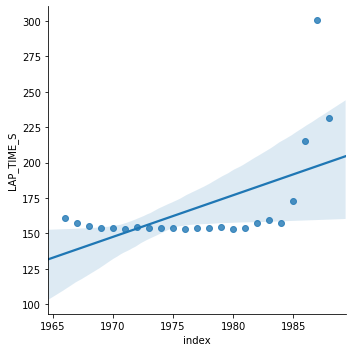

In [36]:
import seaborn as sns

sns.lmplot(x='index', y='LAP_TIME_S',
           data=sample_laptimes(laptimes,'56_1', 1, 2).reset_index());


We can also increase the `order` of the fit line; the `ci` parameter toggles the confidence bounds display:

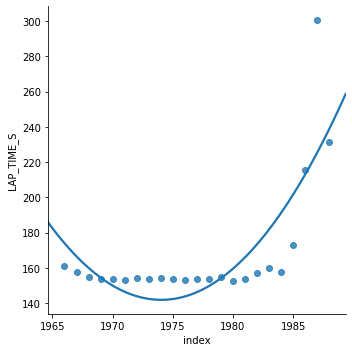

In [37]:
sns.lmplot(x='index', y='LAP_TIME_S',
           data=sample_laptimes(laptimes,'56_1', 1, 2).reset_index(),
           order = 2, ci=None);


### Obtaining Simple Linear Model Parameters

Being able to plot linear models directly over a dataset is graphically useful, but what if we want ot get hold of the numerical model parameters?

In [ ]:
#!pip3 install --upgrade statsmodels
#Simple model
import statsmodels.api as sm


Y = sample_laptimes(laptimes,'56_1', 1, 2).reset_index(drop=True)
X = Y.index.values
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

In [ ]:
p = model.params

ax = pd.DataFrame(Y).reset_index().plot(kind='scatter', x='index', y='LAP_TIME_S')
ax.plot(X, p.const + p.x1 * X);

In [ ]:
import matplotlib.pyplot as plt

# scatter-plot data
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, 0, ax=ax)

### Piecewise Linear Models

Sometimes we may be able to fit a dataset quite accurately using a simple first order linear model or second order model, but in other cases a more accurate fit may come from combining several first order linear models over different parts of the data, a so-called *piecewise linear model*.

There are a couple of Python packages out there that provide support for this, including [`DataDog/piecewise`](https://github.com/DataDog/piecewise) and the more acticely maintained [*piecewise_linear_fit_py* (`pwlf`)](https://github.com/cjekel/piecewise_linear_fit_py) [[docs](https://jekel.me/piecewise_linear_fit_py/)].

Let's explore the `pwlf` model by pulling out a couple of data columns used in the above charts:

In [80]:
data = sample_laptimes(laptimes,'56_1', 1, 2).reset_index()
x = data['index']
y = data['LAP_TIME_S']

We can create a model using a specified number of linear segments, in this case, 2. Optionally, we could provide an indication of where we want the breaks to fall along the x-axis, although by default the `.fit()` method will try to find the "best fit" break point(s). 

In [82]:
#!pip3 install --upgrade scipy
#!pip3 install pwlf
import pwlf
import numpy as np

pwlf_fit = pwlf.PiecewiseLinFit(x, y)
# fit the data using two line segments
pwlf_fit_2_segments = pwlf_fit.fit(2)

We can view the model by plotting points predicted using the fitted model for given x-values over the range in the original data:

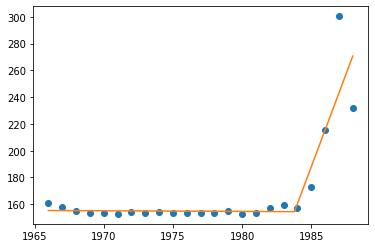

In [83]:
import matplotlib.pyplot as plt

# From the docs, generate a prediction
xHat = np.linspace(min(x), max(x), num=10000)
yHat = pwlf_fit.predict(xHat)

# Plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

We can also review the model parameters:

In [79]:
pwlf_fit.slopes, pwlf_fit.intercepts, pwlf_fit.fit_breaks

(array([-0.04954141, 27.57369258]),
 array([   252.70466964, -54545.79524728]),
 array([1966.        , 1983.78292549, 1988.        ]))

## Simple Race Position Calculations

Some simple demonstrations of calculating track position data.

Naively, calculate position based on lap number and accumulated time (there may be complications based on whether the lead car records a laptime from pit entry...).

In [ ]:
#Find accumulated time in seconds
laptimes['ELAPSED_S']=laptimes['ELAPSED'].apply(getTime)


#Check
laptimes['CHECK_ELAPSED_S'] = laptimes.groupby('NUMBER')['LAP_TIME_S'].cumsum()

laptimes[['ELAPSED','ELAPSED_S','CHECK_ELAPSED_S']].tail()

We can use the position to identify the leader on each lap and from that a count of leadlap number for each car:

In [ ]:
#Find position based on accumulated laptime
laptimes = laptimes.sort_values('ELAPSED_S')
laptimes['POS'] = laptimes.groupby('LAP_NUMBER')['ELAPSED_S'].rank()

#Find leader naively
laptimes['leader'] = laptimes['POS']==1

#Find lead lap number
laptimes['LEAD_LAP_NUMBER'] = laptimes['leader'].cumsum()

laptimes[['LAP_NUMBER','LEAD_LAP_NUMBER']].tail()

## Simple Race Position Chart - Top 10 At End

Find last lap number, then get top 10 on that lap.

In [ ]:
LAST_LAP = laptimes['LEAD_LAP_NUMBER'].max()
LAST_LAP

In [ ]:
#Find top 10 at end
cols = ['NUMBER','TEAM', 'DRIVER_NAME', 'CLASS','LAP_NUMBER','ELAPSED']
top10 = laptimes[laptimes['LEAD_LAP_NUMBER']==LAST_LAP].sort_values(['LEAD_LAP_NUMBER', 'POS'])[cols].head(10).reset_index(drop=True)
top10.index += 1
top10